In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('flow_multi_60.csv')

In [3]:
df['Dur'].max()

59.99998100000001

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
cf_matrix = confusion_matrix(y_test, rfc_pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

NameError: name 'confusion_matrix' is not defined

## KNN test on 5 sec

In [8]:
df1 = pd.read_csv('flow_multi_5.csv')

In [9]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df1.drop('Class',axis=1)
y_test = df1['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[217   0   3  20]
 [  5  61 173   1]
 [  7  12 218   3]
 [  2 123  23  92]]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.61

Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.64
Macro Recall: 0.61
Macro F1-score: 0.60

Weighted Precision: 0.64
Weighted Recall: 0.61
Weighted F1-score: 0.60

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      0.90      0.92       240
     Class 2       0.31      0.25      0.28       240
     Class 3       0.52      0.91      0.66       240
     Class 4       0.79      0.38      0.52       240

    accuracy                           0.61       960
   macro avg       0.64      0.61      0.60       960
weighted avg       0.64      0.61      0.60       960



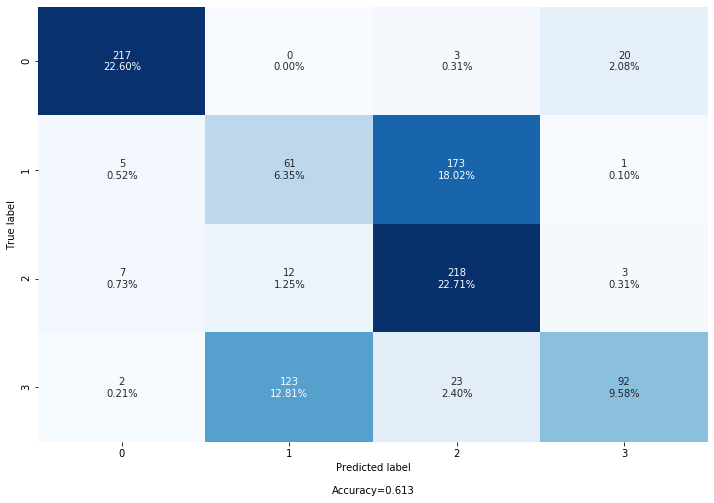

In [11]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 10 sec

In [13]:

df2 = pd.read_csv('flow_multi_10.csv')

In [14]:
df2['Dur'].max()

9.999999

In [15]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df2.drop('Class',axis=1)
y_test = df2['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[239   0   1   0]
 [ 10  71  30 129]
 [  1  10 227   2]
 [  3  88  18 131]]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.70

Micro Precision: 0.70
Micro Recall: 0.70
Micro F1-score: 0.70

Macro Precision: 0.67
Macro Recall: 0.70
Macro F1-score: 0.68

Weighted Precision: 0.67
Weighted Recall: 0.70
Weighted F1-score: 0.68

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      1.00      0.97       240
     Class 2       0.42      0.30      0.35       240
     Class 3       0.82      0.95      0.88       240
     Class 4       0.50      0.55      0.52       240

    accuracy                           0.70       960
   macro avg       0.67      0.70      0.68       960
weighted avg       0.67      0.70      0.68       960



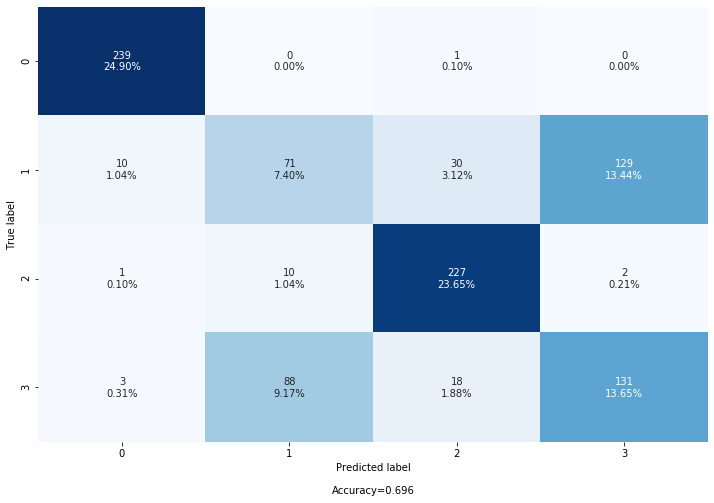

In [18]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 15 sec


In [19]:
df3 = pd.read_csv('flow_multi_15.csv')

In [20]:
df3['Dur'].max()

14.999995000000002

In [21]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df3.drop('Class',axis=1)
y_test = df3['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[237   2   1   0]
 [ 11  81   8 140]
 [  1   9 227   3]
 [  4   0   6 230]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.81

Micro Precision: 0.81
Micro Recall: 0.81
Micro F1-score: 0.81

Macro Precision: 0.84
Macro Recall: 0.81
Macro F1-score: 0.79

Weighted Precision: 0.84
Weighted Recall: 0.81
Weighted F1-score: 0.79

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      0.99      0.96       240
     Class 2       0.88      0.34      0.49       240
     Class 3       0.94      0.95      0.94       240
     Class 4       0.62      0.96      0.75       240

    accuracy                           0.81       960
   macro avg       0.84      0.81      0.79       960
weighted avg       0.84      0.81      0.79       960



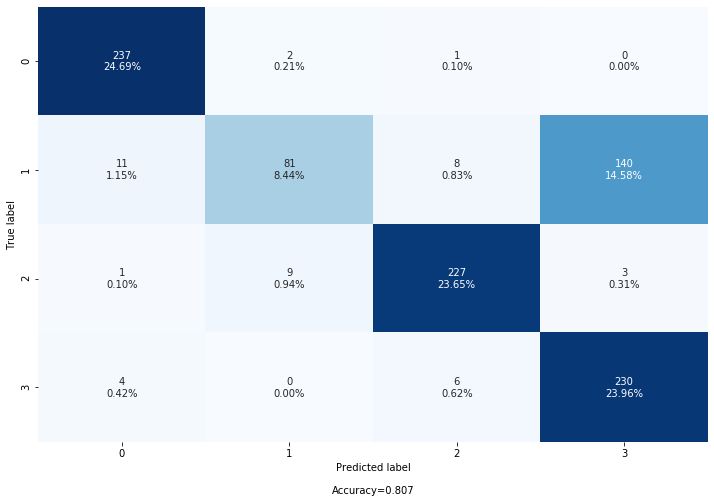

In [24]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 20 sec


In [25]:
df4 = pd.read_csv('flow_multi_20.csv')

In [26]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df4.drop('Class',axis=1)
y_test = df4['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[235   1   4   0]
 [ 17  98  15 110]
 [  3  11 222   4]
 [  1   0   9 230]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.84
Macro Recall: 0.82
Macro F1-score: 0.80

Weighted Precision: 0.84
Weighted Recall: 0.82
Weighted F1-score: 0.80

Classification Report

              precision    recall  f1-score   support

     Class 1       0.92      0.98      0.95       240
     Class 2       0.89      0.41      0.56       240
     Class 3       0.89      0.93      0.91       240
     Class 4       0.67      0.96      0.79       240

    accuracy                           0.82       960
   macro avg       0.84      0.82      0.80       960
weighted avg       0.84      0.82      0.80       960



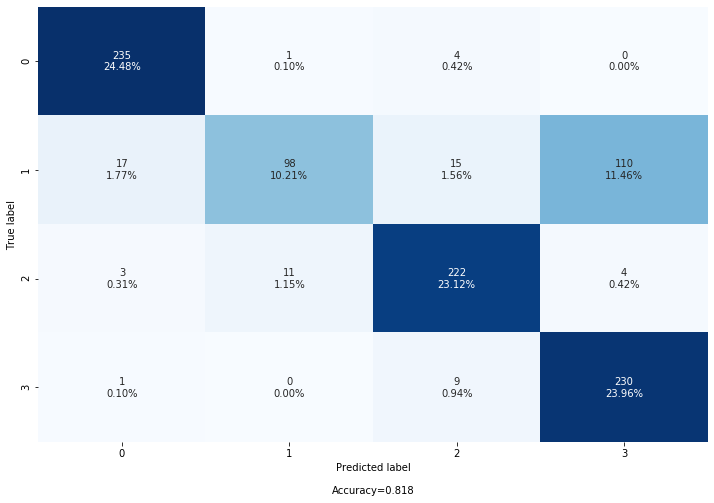

In [29]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 25 sec


In [30]:
df6 = pd.read_csv('flow_multi_25.csv')

In [31]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df6.drop('Class',axis=1)
y_test = df6['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[237   0   3   0]
 [ 13 152   7  68]
 [  2   6 231   1]
 [  0   0   8 232]]


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.90
Macro Recall: 0.89
Macro F1-score: 0.88

Weighted Precision: 0.90
Weighted Recall: 0.89
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      0.99      0.96       240
     Class 2       0.96      0.63      0.76       240
     Class 3       0.93      0.96      0.94       240
     Class 4       0.77      0.97      0.86       240

    accuracy                           0.89       960
   macro avg       0.90      0.89      0.88       960
weighted avg       0.90      0.89      0.88       960



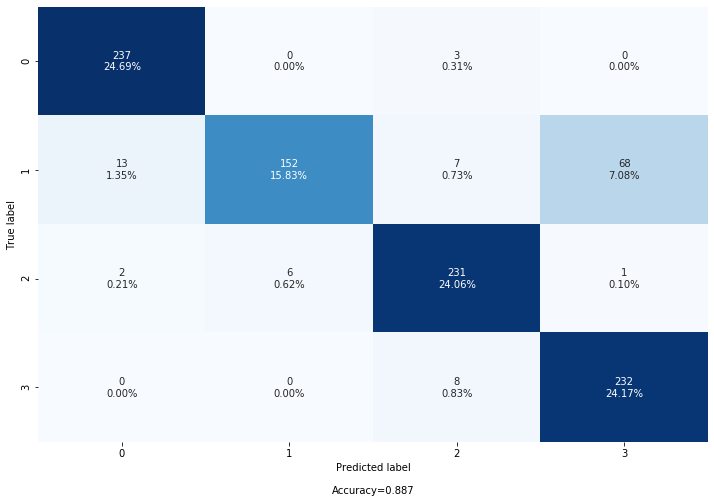

In [34]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

## KNN test on 30 sec


In [35]:
df5 = pd.read_csv('flow_multi_30.csv')

In [36]:
X_train = df.drop('Class',axis=1)
y_train = df['Class']
X_test = df5.drop('Class',axis=1)
y_test = df5['Class']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()


,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[237   1   2   0]
 [  4 182   7  47]
 [  1   7 230   2]
 [  1   0   5 234]]


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.92

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.93
Macro Recall: 0.92
Macro F1-score: 0.92

Weighted Precision: 0.93
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

     Class 1       0.98      0.99      0.98       240
     Class 2       0.96      0.76      0.85       240
     Class 3       0.94      0.96      0.95       240
     Class 4       0.83      0.97      0.89       240

    accuracy                           0.92       960
   macro avg       0.93      0.92      0.92       960
weighted avg       0.93      0.92      0.92       960



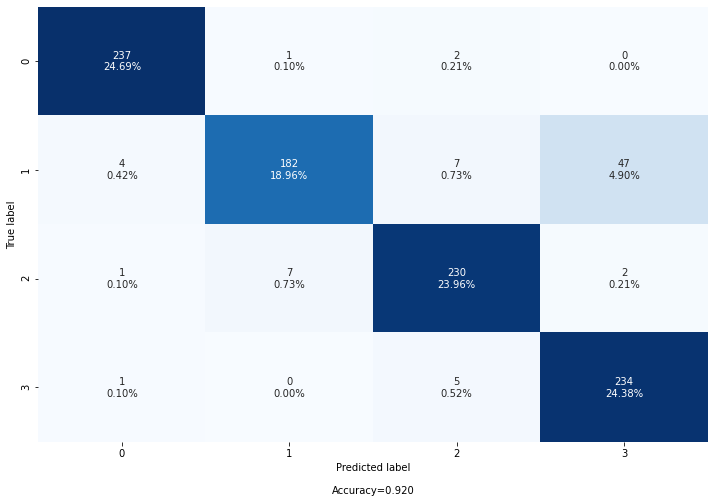

In [32]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

# KNN test on 60 sec


In [39]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
scaler.fit(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Dur,RunTime,IdleTime,Mean,StdDev,Sum,Min,Max,TotPkts,SrcPkts,...,TcpRtt,SynAck,AckDat,Load,State_CON,State_FIN,State_RST,Flgs_ e,Flgs_ e *,Flgs_ e s
0,1.095640,1.095640,0.0,1.095640,0.0,1.095640,1.095640,1.095640,3.624319,3.696427,...,-0.089816,-0.468856,-0.088975,3.396027,0.669301,-0.5,-0.350438,-1.254483,-0.537206,2.314652
1,-1.130656,-1.130656,0.0,-1.130656,0.0,-1.130656,-1.130656,-1.130656,-0.387310,-0.374931,...,-0.353736,-0.555657,-0.352706,0.022475,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
2,-0.533053,-0.533053,0.0,-0.533053,0.0,-0.533053,-0.533053,-0.533053,-0.387226,-0.374881,...,-0.272981,-0.681036,-0.271740,-0.472260,-1.494096,2.0,-0.350438,0.797141,-0.537206,-0.432030
3,-1.130500,-1.130500,0.0,-1.130500,0.0,-1.130500,-1.130500,-1.130500,-0.387310,-0.374931,...,-0.282734,1.151429,-0.284732,-0.441899,0.669301,-0.5,-0.350438,0.797141,-0.537206,-0.432030
4,0.370671,0.370671,0.0,0.370671,0.0,0.370671,0.370671,0.370671,-0.387247,-0.374981,...,-0.303741,-0.574946,-0.302684,-0.472277,-1.494096,-0.5,2.853569,0.797141,-0.537206,-0.432030


In [40]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[61  0  4  2]
 [ 1 69  2  3]
 [ 0  2 70  0]
 [ 0  0  1 73]]


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4']))



Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.95
Macro Recall: 0.95
Macro F1-score: 0.95

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

     Class 1       0.98      0.91      0.95        67
     Class 2       0.97      0.92      0.95        75
     Class 3       0.91      0.97      0.94        72
     Class 4       0.94      0.99      0.96        74

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288



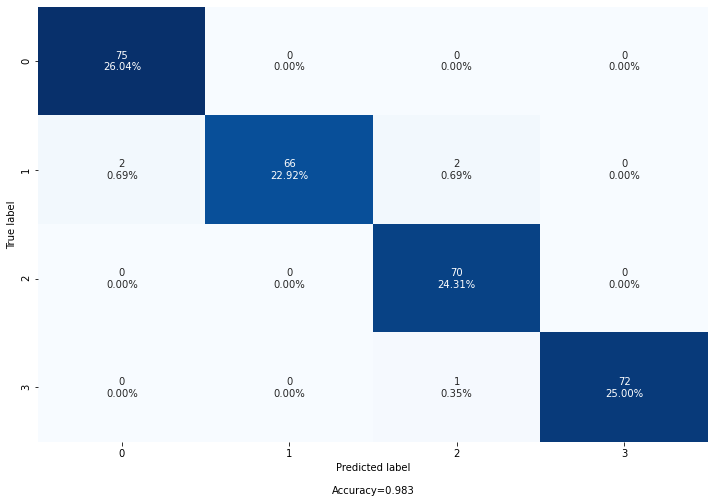

In [35]:
cf_matrix = confusion_matrix(y_test, pred)

make_confusion_matrix(cf_matrix, figsize=(12,8), cbar=False)

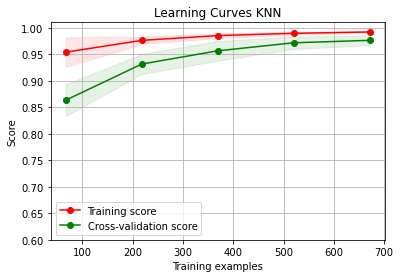

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='f1_macro')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = df.drop('Class',axis=1)
y = df['Class']



title = "Learning Curves KNN"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
knn_cv = KNeighborsClassifier(n_neighbors=2)
plot_learning_curve(knn_cv, title, X, y, (0.6, 1.01), cv=cv, n_jobs=10)

plt.show()